# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
import re,string
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,LayerNormalization

In [2]:
df=pd.read_csv('/kaggle/input/simple-dialogs-for-chatbot/dialogs.txt',sep='\t',names=['question','answer'])
print(f'Dataframe size: {len(df)}')
df.head()

Dataframe size: 3725


,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


# Data Preprocessing

## Data Visualization

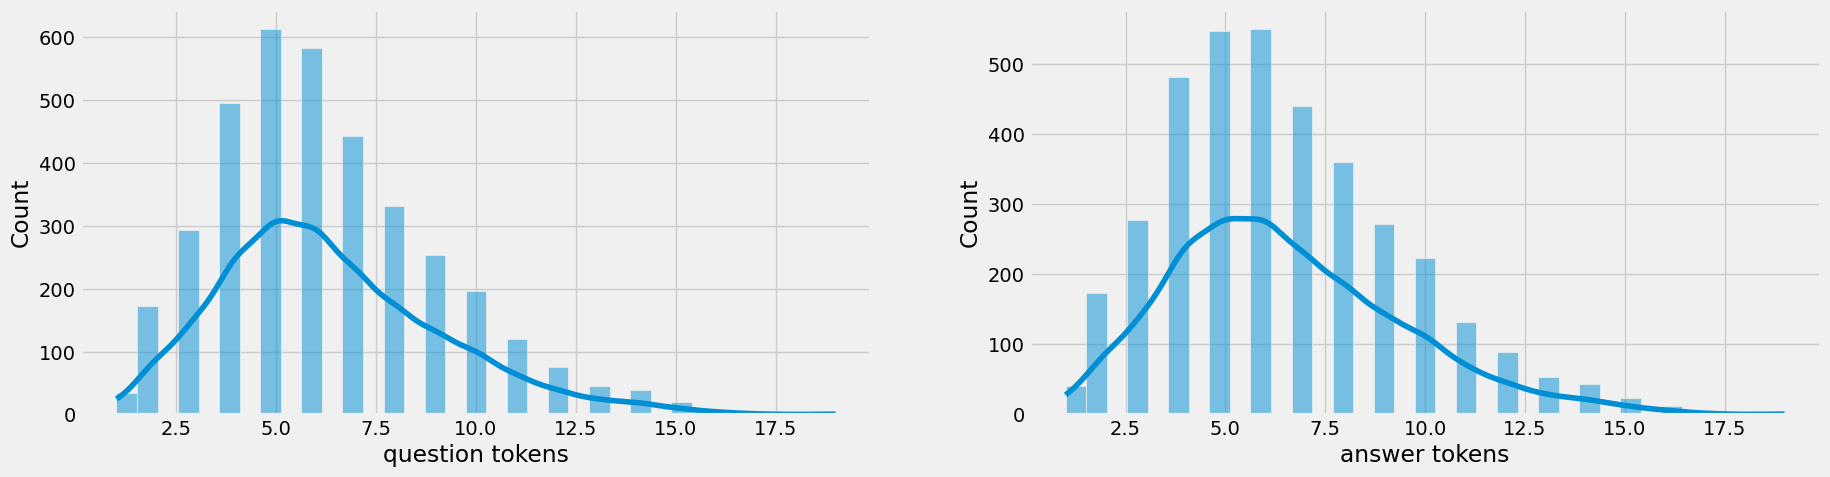

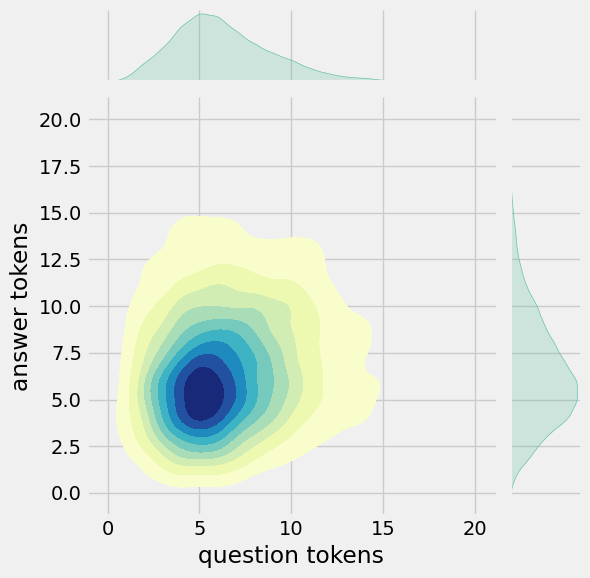

In [3]:


df['question tokens']=df['question'].apply(lambda x:len(x.split()))
df['answer tokens']=df['answer'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['question tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['answer tokens'],data=df,kde=True,ax=ax[1])
sns.jointplot(x='question tokens',y='answer tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

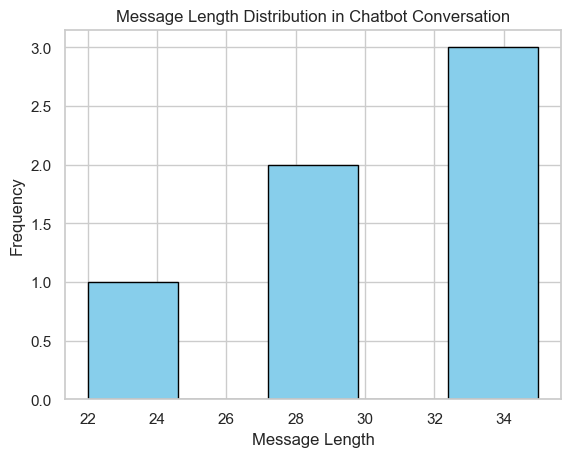

In [4]:
import matplotlib.pyplot as plt

# Define the conversation
conversation = [
    ("hi, how are you doing?", "i'm fine. how about yourself?"),
    ("i'm fine. how about yourself?", "i'm pretty good. thanks for asking."),
    ("i'm pretty good. thanks for asking.", "no problem. so how have you been?"),
]

# Calculate the lengths of each message using lambda
message_lengths = [len(msg[0]) for msg in conversation] + [len(msg[1]) for msg in conversation]

# Create a histogram
plt.hist(message_lengths, bins=5, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.title("Message Length Distribution in Chatbot Conversation")

# Show the plot
plt.show()


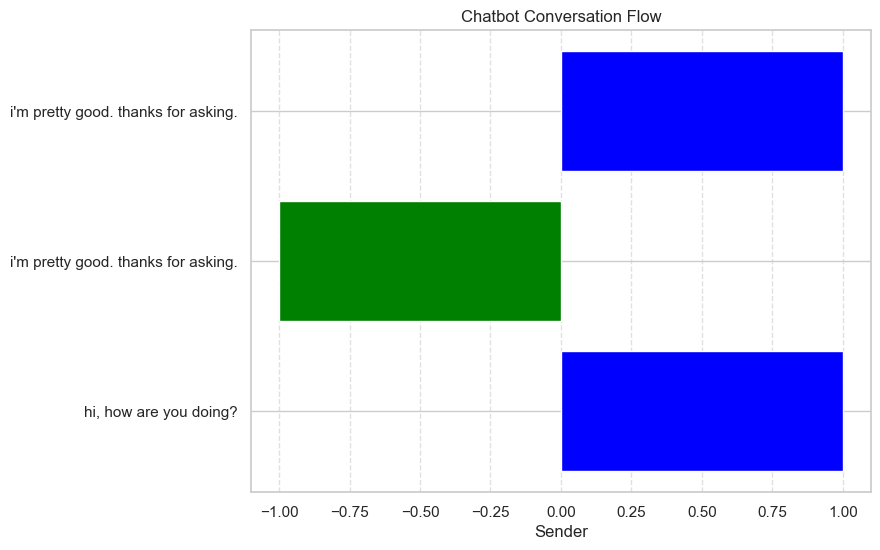

In [6]:
import matplotlib.pyplot as plt

# Define the conversation
conversation = [
    ("hi, how are you doing?", "i'm fine. how about yourself?"),
    ("i'm fine. how about yourself?", "i'm pretty good. thanks for asking."),
    ("i'm pretty good. thanks for asking.", "no problem. so how have you been?")
]

# Extract sender and receiver
senders = ["User" if i % 2 == 0 else "Chatbot" for i in range(len(conversation))]
messages = [msg[0] if i % 2 == 0 else msg[1] for i, msg in enumerate(conversation)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the conversation flow using a bar chart
plt.barh(range(len(senders)), [1 if sender == "User" else -1 for sender in senders], color=['blue' if sender == "User" else 'green' for sender in senders])

# Customize the plot
plt.yticks(range(len(senders)), messages)
plt.xlabel("Sender")
plt.title("Chatbot Conversation Flow")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


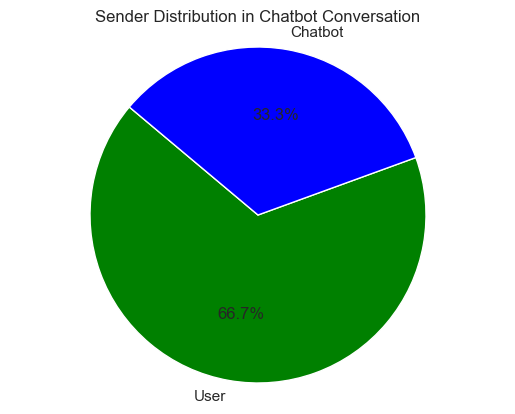

In [5]:
import matplotlib.pyplot as plt

# Define the conversation
conversation = [
    ("hi, how are you doing?", "i'm fine. how about yourself?"),
    ("i'm fine. how about yourself?", "i'm pretty good. thanks for asking."),
    ("i'm pretty good. thanks for asking.", "no problem. so how have you been?")
]

# Extract senders
senders = ["User" if i % 2 == 0 else "Chatbot" for i in range(len(conversation))]

# Count the number of messages sent by each sender
user_messages = senders.count("User")
chatbot_messages = senders.count("Chatbot")

# Create a pie chart
labels = ['User', 'Chatbot']
sizes = [user_messages, chatbot_messages]
colors = ['green', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize the plot
plt.title("Sender Distribution in Chatbot Conversation")

# Show the plot
plt.show()


C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


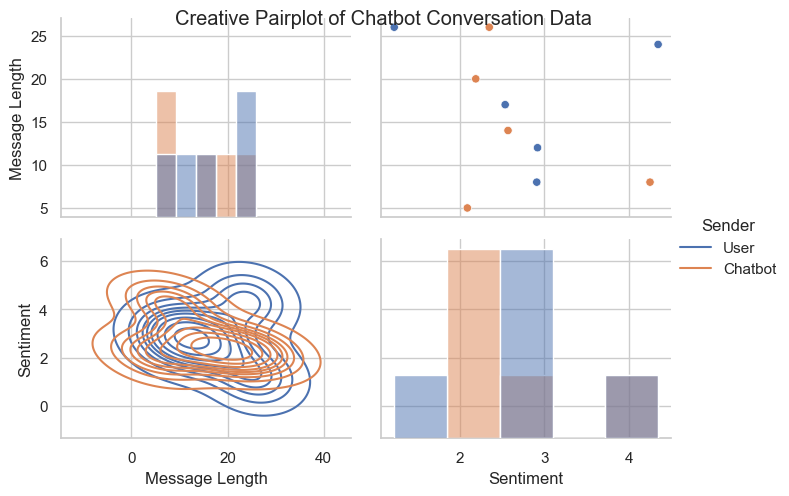

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate some random data for demonstration
np.random.seed(0)
n_samples = 10  # Number of data points

# Simulate the conversation data
senders = ["User", "Chatbot"] * (n_samples // 2)
message_lengths = np.random.randint(5, 30, n_samples)
message_sentiments = np.random.uniform(1, 5, n_samples)

# Create a DataFrame
df = pd.DataFrame({"Sender": senders, "Message Length": message_lengths, "Sentiment": message_sentiments})

# Create a pairplot with creative data representation
sns.set(style="whitegrid")
g = sns.PairGrid(df, hue="Sender", aspect=1.4)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot, cmap="Blues")

# Customize the plot
g.add_legend()
g.fig.suptitle("Creative Pairplot of Chatbot Conversation Data")

# Show the plot
plt.show()


## Text Cleaning

In [4]:


def clean_text(text):
    text=re.sub('-',' ',text.lower())
    text=re.sub('[.]',' . ',text)
    text=re.sub('[1]',' 1 ',text)
    text=re.sub('[2]',' 2 ',text)
    text=re.sub('[3]',' 3 ',text)
    text=re.sub('[4]',' 4 ',text)
    text=re.sub('[5]',' 5 ',text)
    text=re.sub('[6]',' 6 ',text)
    text=re.sub('[7]',' 7 ',text)
    text=re.sub('[8]',' 8 ',text)
    text=re.sub('[9]',' 9 ',text)
    text=re.sub('[0]',' 0 ',text)
    text=re.sub('[,]',' , ',text)
    text=re.sub('[?]',' ? ',text)
    text=re.sub('[!]',' ! ',text)
    text=re.sub('[$]',' $ ',text)
    text=re.sub('[&]',' & ',text)
    text=re.sub('[/]',' / ',text)
    text=re.sub('[:]',' : ',text)
    text=re.sub('[;]',' ; ',text)
    text=re.sub('[*]',' * ',text)
    text=re.sub('[\']',' \' ',text)
    text=re.sub('[\"]',' \" ',text)
    text=re.sub('\t',' ',text)
    return text

df.drop(columns=['answer tokens','question tokens'],axis=1,inplace=True)
df['encoder_inputs']=df['question'].apply(clean_text)
df['decoder_targets']=df['answer'].apply(clean_text)+' <end>'
df['decoder_inputs']='<start> '+df['answer'].apply(clean_text)+' <end>'

df.head(10)

,question,answer,encoder_inputs,decoder_targets,decoder_inputs
0,"hi, how are you doing?",i'm fine. how about yourself?,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem. so how have you been?,i've been great. what about you?,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i've been great. what about you?,i've been good. i'm in school right now.,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i've been good. i'm in school right now.,what school do you go to?,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to?,i go to pcc.,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc.,do you like it there?,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there?,it's okay. it's a really big campus.,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it's okay. it's a really big campus.,good luck with school.,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


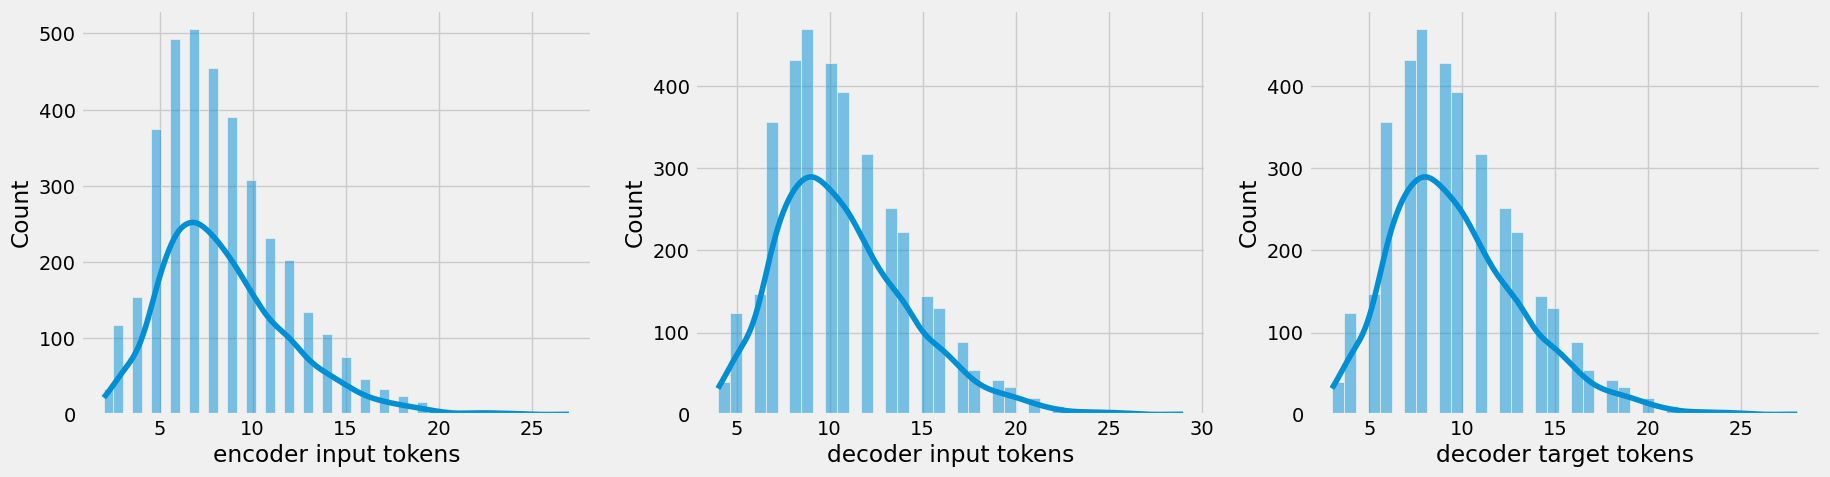

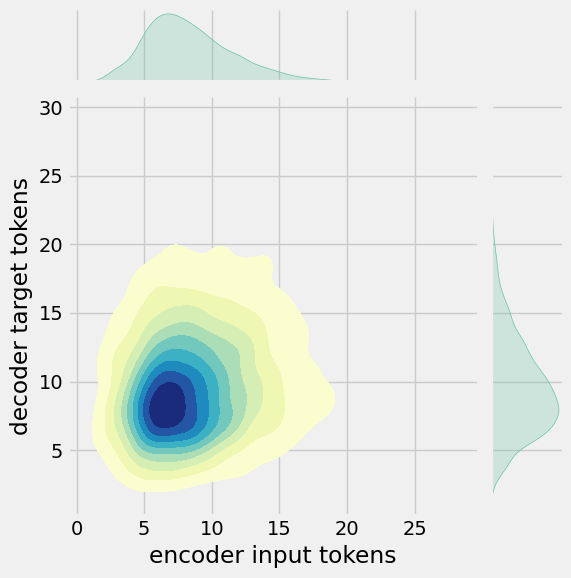

In [5]:
df['encoder input tokens']=df['encoder_inputs'].apply(lambda x:len(x.split()))
df['decoder input tokens']=df['decoder_inputs'].apply(lambda x:len(x.split()))
df['decoder target tokens']=df['decoder_targets'].apply(lambda x:len(x.split()))
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.set_palette('Set2')
sns.histplot(x=df['encoder input tokens'],data=df,kde=True,ax=ax[0])
sns.histplot(x=df['decoder input tokens'],data=df,kde=True,ax=ax[1])
sns.histplot(x=df['decoder target tokens'],data=df,kde=True,ax=ax[2])
sns.jointplot(x='encoder input tokens',y='decoder target tokens',data=df,kind='kde',fill=True,cmap='YlGnBu')
plt.show()

In [6]:
print(f"After preprocessing: {' '.join(df[df['encoder input tokens'].max()==df['encoder input tokens']]['encoder_inputs'].values.tolist())}")
print(f"Max encoder input length: {df['encoder input tokens'].max()}")
print(f"Max decoder input length: {df['decoder input tokens'].max()}")
print(f"Max decoder target length: {df['decoder target tokens'].max()}")

df.drop(columns=['question','answer','encoder input tokens','decoder input tokens','decoder target tokens'],axis=1,inplace=True)
params={
    "vocab_size":2500,
    "max_sequence_length":30,
    "learning_rate":0.008,
    "batch_size":149,
    "lstm_cells":256,
    "embedding_dim":256,
    "buffer_size":10000
}
learning_rate=params['learning_rate']
batch_size=params['batch_size']
embedding_dim=params['embedding_dim']
lstm_cells=params['lstm_cells']
vocab_size=params['vocab_size']
buffer_size=params['buffer_size']
max_sequence_length=params['max_sequence_length']
df.head(10)

After preprocessing: for example ,  if your birth date is january  1  2  ,   1  9  8  7  ,  write  0  1  /  1  2  /  8  7  . 
Max encoder input length: 27
Max decoder input length: 29
Max decoder target length: 28


,encoder_inputs,decoder_targets,decoder_inputs
0,"hi , how are you doing ?",i ' m fine . how about yourself ? <end>,<start> i ' m fine . how about yourself ? <end>
1,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking . <end>,<start> i ' m pretty good . thanks for asking...
2,i ' m pretty good . thanks for asking .,no problem . so how have you been ? <end>,<start> no problem . so how have you been ? ...
3,no problem . so how have you been ?,i ' ve been great . what about you ? <end>,<start> i ' ve been great . what about you ? ...
4,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now ...,<start> i ' ve been good . i ' m in school ri...
5,i ' ve been good . i ' m in school right now .,what school do you go to ? <end>,<start> what school do you go to ? <end>
6,what school do you go to ?,i go to pcc . <end>,<start> i go to pcc . <end>
7,i go to pcc .,do you like it there ? <end>,<start> do you like it there ? <end>
8,do you like it there ?,it ' s okay . it ' s a really big campus . <...,<start> it ' s okay . it ' s a really big cam...
9,it ' s okay . it ' s a really big campus .,good luck with school . <end>,<start> good luck with school . <end>


## Tokenization

In [7]:


vectorize_layer=TextVectorization(
    max_tokens=vocab_size,
    standardize=None,
    output_mode='int',
    output_sequence_length=max_sequence_length
)
vectorize_layer.adapt(df['encoder_inputs']+' '+df['decoder_targets']+' <start> <end>')
vocab_size=len(vectorize_layer.get_vocabulary())
print(f'Vocab size: {len(vectorize_layer.get_vocabulary())}')
print(f'{vectorize_layer.get_vocabulary()[:12]}')

Vocab size: 2443
['', '[UNK]', '<end>', '.', '<start>', "'", 'i', '?', 'you', ',', 'the', 'to']


In [8]:
def sequences2ids(sequence):
    return vectorize_layer(sequence)

def ids2sequences(ids):
    decode=''
    if type(ids)==int:
        ids=[ids]
    for id in ids:
        decode+=vectorize_layer.get_vocabulary()[id]+' '
    return decode

x=sequences2ids(df['encoder_inputs'])
yd=sequences2ids(df['decoder_inputs'])
y=sequences2ids(df['decoder_targets'])

print(f'Question sentence: hi , how are you ?')
print(f'Question to tokens: {sequences2ids("hi , how are you ?")[:10]}')
print(f'Encoder input shape: {x.shape}')
print(f'Decoder input shape: {yd.shape}')
print(f'Decoder target shape: {y.shape}')

Question sentence: hi , how are you ?
Question to tokens: [1971    9   45   24    8    7    0    0    0    0]
Encoder input shape: (3725, 30)
Decoder input shape: (3725, 30)
Decoder target shape: (3725, 30)


In [9]:
print(f'Encoder input: {x[0][:12]} ...')
print(f'Decoder input: {yd[0][:12]} ...')    # shifted by one time step of the target as input to decoder is the output of the previous timestep
print(f'Decoder target: {y[0][:12]} ...')

Encoder input: [1971    9   45   24    8  194    7    0    0    0    0    0] ...
Decoder input: [  4   6   5  38 646   3  45  41 563   7   2   0] ...
Decoder target: [  6   5  38 646   3  45  41 563   7   2   0   0] ...


In [10]:
data=tf.data.Dataset.from_tensor_slices((x,yd,y))
data=data.shuffle(buffer_size)

train_data=data.take(int(.9*len(data)))
train_data=train_data.cache()
train_data=train_data.shuffle(buffer_size)
train_data=train_data.batch(batch_size)
train_data=train_data.prefetch(tf.data.AUTOTUNE)
train_data_iterator=train_data.as_numpy_iterator()

val_data=data.skip(int(.9*len(data))).take(int(.1*len(data)))
val_data=val_data.batch(batch_size)
val_data=val_data.prefetch(tf.data.AUTOTUNE)

_=train_data_iterator.next()
print(f'Number of train batches: {len(train_data)}')
print(f'Number of training data: {len(train_data)*batch_size}')
print(f'Number of validation batches: {len(val_data)}')
print(f'Number of validation data: {len(val_data)*batch_size}')
print(f'Encoder Input shape (with batches): {_[0].shape}')
print(f'Decoder Input shape (with batches): {_[1].shape}')
print(f'Target Output shape (with batches): {_[2].shape}')

Number of train batches: 23
Number of training data: 3427
Number of validation batches: 3
Number of validation data: 447
Encoder Input shape (with batches): (149, 30)
Decoder Input shape (with batches): (149, 30)
Target Output shape (with batches): (149, 30)


# Build Models

## Build Encoder

In [11]:
class Encoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.vocab_size=vocab_size
        self.embedding_dim=embedding_dim
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='encoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.GlorotNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='encoder_lstm',
            kernel_initializer=tf.keras.initializers.GlorotNormal()
        )
    
    def call(self,encoder_inputs):
        self.inputs=encoder_inputs
        x=self.embedding(encoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        encoder_outputs,encoder_state_h,encoder_state_c=self.lstm(x)
        self.outputs=[encoder_state_h,encoder_state_c]
        return encoder_state_h,encoder_state_c

encoder=Encoder(lstm_cells,embedding_dim,vocab_size,name='encoder')
encoder.call(_[0])

(<tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 0.16966951, -0.10419625, -0.12700348, ..., -0.12251794,
          0.10568858,  0.14841646],
        [ 0.08443093,  0.08849293, -0.09065959, ..., -0.00959182,
          0.10152507, -0.12077457],
        [ 0.03628462, -0.02653611, -0.11506603, ..., -0.14669597,
          0.10292757,  0.13625325],
        ...,
        [-0.14210635, -0.12942064, -0.03288083, ...,  0.0568463 ,
         -0.02598592, -0.22455114],
        [ 0.20819993,  0.01196991, -0.09635217, ..., -0.18782297,
          0.10233591,  0.20114912],
        [ 0.1164271 , -0.07769038, -0.06414707, ..., -0.06539135,
         -0.05518465,  0.25142196]], dtype=float32)>,
 <tf.Tensor: shape=(149, 256), dtype=float32, numpy=
 array([[ 0.34589   , -0.30134732, -0.43572   , ..., -0.3102559 ,
          0.34630865,  0.2613009 ],
        [ 0.14154069,  0.17045322, -0.17749965, ..., -0.02712595,
          0.17292541, -0.2922624 ],
        [ 0.07106856, -0.0739173 , -0.3641197 ,

Build Encoder##  Build Decoder

In [12]:
class Decoder(tf.keras.models.Model):
    def __init__(self,units,embedding_dim,vocab_size,*args,**kwargs) -> None:
        super().__init__(*args,**kwargs)
        self.units=units
        self.embedding_dim=embedding_dim
        self.vocab_size=vocab_size
        self.embedding=Embedding(
            vocab_size,
            embedding_dim,
            name='decoder_embedding',
            mask_zero=True,
            embeddings_initializer=tf.keras.initializers.HeNormal()
        )
        self.normalize=LayerNormalization()
        self.lstm=LSTM(
            units,
            dropout=.4,
            return_state=True,
            return_sequences=True,
            name='decoder_lstm',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
        self.fc=Dense(
            vocab_size,
            activation='softmax',
            name='decoder_dense',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
    
    def call(self,decoder_inputs,encoder_states):
        x=self.embedding(decoder_inputs)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        x,decoder_state_h,decoder_state_c=self.lstm(x,initial_state=encoder_states)
        x=self.normalize(x)
        x=Dropout(.4)(x)
        return self.fc(x)

decoder=Decoder(lstm_cells,embedding_dim,vocab_size,name='decoder')
decoder(_[1][:1],encoder(_[0][:1]))

<tf.Tensor: shape=(1, 30, 2443), dtype=float32, numpy=
array([[[3.4059247e-04, 5.7348556e-05, 2.1294907e-05, ...,
         7.2067953e-05, 1.5453645e-03, 2.3599296e-04],
        [1.4662130e-03, 8.0250365e-06, 5.4062020e-05, ...,
         1.9187471e-05, 9.7244098e-05, 7.6433855e-05],
        [9.6929165e-05, 2.7441782e-05, 1.3761305e-03, ...,
         3.6009602e-05, 1.5537882e-04, 1.8397317e-04],
        ...,
        [1.9002777e-03, 6.9266016e-04, 1.4346189e-04, ...,
         1.9552530e-04, 1.7106640e-05, 1.0252406e-04],
        [1.9002777e-03, 6.9266016e-04, 1.4346189e-04, ...,
         1.9552530e-04, 1.7106640e-05, 1.0252406e-04],
        [1.9002777e-03, 6.9266016e-04, 1.4346189e-04, ...,
         1.9552530e-04, 1.7106640e-05, 1.0252406e-04]]], dtype=float32)>

## Build Training Model

In [13]:
class ChatBotTrainer(tf.keras.models.Model):
    def __init__(self,encoder,decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder=encoder
        self.decoder=decoder

    def loss_fn(self,y_true,y_pred):
        loss=self.loss(y_true,y_pred)
        mask=tf.math.logical_not(tf.math.equal(y_true,0))
        mask=tf.cast(mask,dtype=loss.dtype)
        loss*=mask
        return tf.reduce_mean(loss)
    
    def accuracy_fn(self,y_true,y_pred):
        pred_values = tf.cast(tf.argmax(y_pred, axis=-1), dtype='int64')
        correct = tf.cast(tf.equal(y_true, pred_values), dtype='float64')
        mask = tf.cast(tf.greater(y_true, 0), dtype='float64')
        n_correct = tf.keras.backend.sum(mask * correct)
        n_total = tf.keras.backend.sum(mask)
        return n_correct / n_total

    def call(self,inputs):
        encoder_inputs,decoder_inputs=inputs
        encoder_states=self.encoder(encoder_inputs)
        return self.decoder(decoder_inputs,encoder_states)

    def train_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        with tf.GradientTape() as tape:
            encoder_states=self.encoder(encoder_inputs,training=True)
            y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
            loss=self.loss_fn(y,y_pred)
            acc=self.accuracy_fn(y,y_pred)

        variables=self.encoder.trainable_variables+self.decoder.trainable_variables
        grads=tape.gradient(loss,variables)
        self.optimizer.apply_gradients(zip(grads,variables))
        metrics={'loss':loss,'accuracy':acc}
        return metrics
    
    def test_step(self,batch):
        encoder_inputs,decoder_inputs,y=batch
        encoder_states=self.encoder(encoder_inputs,training=True)
        y_pred=self.decoder(decoder_inputs,encoder_states,training=True)
        loss=self.loss_fn(y,y_pred)
        acc=self.accuracy_fn(y,y_pred)
        metrics={'loss':loss,'accuracy':acc}
        return metrics

In [14]:
model=ChatBotTrainer(encoder,decoder,name='chatbot_trainer')
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    weighted_metrics=['loss','accuracy']
)
model(_[:2])

<tf.Tensor: shape=(149, 30, 2443), dtype=float32, numpy=
array([[[3.40592262e-04, 5.73484940e-05, 2.12948853e-05, ...,
         7.20679745e-05, 1.54536311e-03, 2.35993255e-04],
        [1.46621116e-03, 8.02504110e-06, 5.40619949e-05, ...,
         1.91874733e-05, 9.72440175e-05, 7.64339056e-05],
        [9.69291723e-05, 2.74417835e-05, 1.37613132e-03, ...,
         3.60095728e-05, 1.55378671e-04, 1.83973272e-04],
        ...,
        [1.90027885e-03, 6.92659756e-04, 1.43461803e-04, ...,
         1.95525470e-04, 1.71066222e-05, 1.02524005e-04],
        [1.90027885e-03, 6.92659756e-04, 1.43461803e-04, ...,
         1.95525470e-04, 1.71066222e-05, 1.02524005e-04],
        [1.90027885e-03, 6.92659756e-04, 1.43461803e-04, ...,
         1.95525470e-04, 1.71066222e-05, 1.02524005e-04]],

       [[9.24730921e-05, 3.46553512e-04, 2.07866033e-05, ...,
         3.65934626e-04, 7.63039337e-04, 5.52638434e-04],
        [8.46863186e-05, 3.65541164e-05, 2.54740953e-05, ...,
         7.12379551e-05, 3

##  Train Model

In [15]:
history=model.fit(
    train_data,
    epochs=100,
    validation_data=val_data,
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        tf.keras.callbacks.ModelCheckpoint('ckpt',verbose=1,save_best_only=True)
    ]
)

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 1.6590 - accuracy: 0.2180
Epoch 1: val_loss improved from inf to 1.21875, saving model to ckpt
23/23 [==============================] - 68s 3s/step - loss: 1.6515 - accuracy: 0.2198 - val_loss: 1.2187 - val_accuracy: 0.3072
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 1.2327 - accuracy: 0.3087
Epoch 2: val_loss improved from 1.21875 to 1.10877, saving model to ckpt
23/23 [==============================] - 53s 2s/step - loss: 1.2287 - accuracy: 0.3092 - val_loss: 1.1088 - val_accuracy: 0.3415
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.3368
Epoch 3: val_loss did not improve from 1.10877
23/23 [==============================] - 22s 973ms/step - loss: 1.0984 - accuracy: 0.3370 - val_loss: 1.1161 - val_accuracy: 0.3315
Epoch 4/100
23/23 [==============================] - ETA: 0s - loss: 1.0209 - accuracy: 0.3536
Epoch 4: val_loss improved from 1.10877 t

#  Visualize Metrics

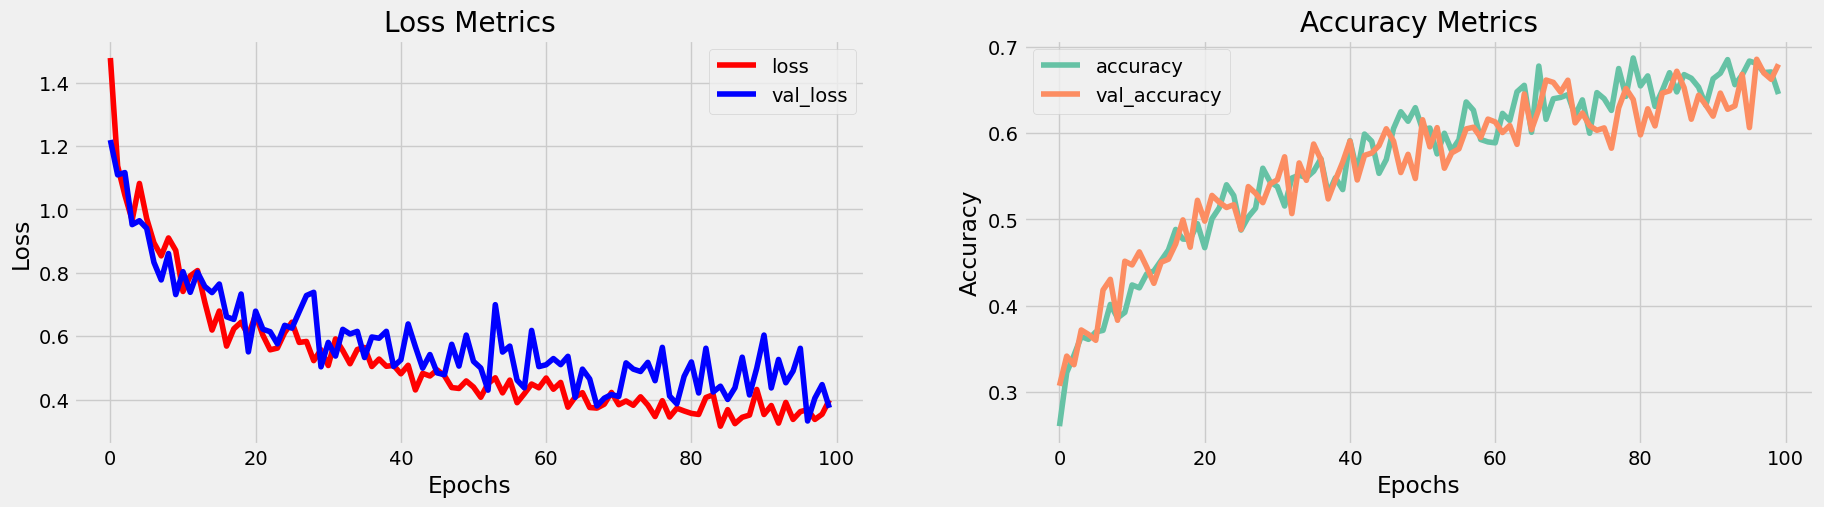

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax[0].plot(history.history['loss'],label='loss',c='red')
ax[0].plot(history.history['val_loss'],label='val_loss',c = 'blue')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[0].set_title('Loss Metrics')
ax[1].set_title('Accuracy Metrics')
ax[1].plot(history.history['accuracy'],label='accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[0].legend()
ax[1].legend()
plt.show()

# Save Model

In [17]:
model.load_weights('ckpt')
model.save('models',save_format='tf')

In [18]:
for idx,i in enumerate(model.layers):
    print('Encoder layers:' if idx==0 else 'Decoder layers: ')
    for j in i.layers:
        print(j)
    print('---------------------')

Encoder layers:
---------------------
Decoder layers: 
---------------------


# Create Inference Model

In [19]:
class ChatBot(tf.keras.models.Model):
    def __init__(self,base_encoder,base_decoder,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.encoder,self.decoder=self.build_inference_model(base_encoder,base_decoder)

    def build_inference_model(self,base_encoder,base_decoder):
        encoder_inputs=tf.keras.Input(shape=(None,))
        x=base_encoder.layers[0](encoder_inputs)
        x=base_encoder.layers[1](x)
        x,encoder_state_h,encoder_state_c=base_encoder.layers[2](x)
        encoder=tf.keras.models.Model(inputs=encoder_inputs,outputs=[encoder_state_h,encoder_state_c],name='chatbot_encoder')

        decoder_input_state_h=tf.keras.Input(shape=(lstm_cells,))
        decoder_input_state_c=tf.keras.Input(shape=(lstm_cells,))
        decoder_inputs=tf.keras.Input(shape=(None,))
        x=base_decoder.layers[0](decoder_inputs)
        x=base_encoder.layers[1](x)
        x,decoder_state_h,decoder_state_c=base_decoder.layers[2](x,initial_state=[decoder_input_state_h,decoder_input_state_c])
        decoder_outputs=base_decoder.layers[-1](x)
        decoder=tf.keras.models.Model(
            inputs=[decoder_inputs,[decoder_input_state_h,decoder_input_state_c]],
            outputs=[decoder_outputs,[decoder_state_h,decoder_state_c]],name='chatbot_decoder'
        )
        return encoder,decoder

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

    def softmax(self,z):
        return np.exp(z)/sum(np.exp(z))

    def sample(self,conditional_probability,temperature=0.5):
        conditional_probability = np.asarray(conditional_probability).astype("float64")
        conditional_probability = np.log(conditional_probability) / temperature
        reweighted_conditional_probability = self.softmax(conditional_probability)
        probas = np.random.multinomial(1, reweighted_conditional_probability, 1)
        return np.argmax(probas)

    def preprocess(self,text):
        text=clean_text(text)
        seq=np.zeros((1,max_sequence_length),dtype=np.int32)
        for i,word in enumerate(text.split()):
            seq[:,i]=sequences2ids(word).numpy()[0]
        return seq
    
    def postprocess(self,text):
        text=re.sub(' - ','-',text.lower())
        text=re.sub(' [.] ','. ',text)
        text=re.sub(' [1] ','1',text)
        text=re.sub(' [2] ','2',text)
        text=re.sub(' [3] ','3',text)
        text=re.sub(' [4] ','4',text)
        text=re.sub(' [5] ','5',text)
        text=re.sub(' [6] ','6',text)
        text=re.sub(' [7] ','7',text)
        text=re.sub(' [8] ','8',text)
        text=re.sub(' [9] ','9',text)
        text=re.sub(' [0] ','0',text)
        text=re.sub(' [,] ',', ',text)
        text=re.sub(' [?] ','? ',text)
        text=re.sub(' [!] ','! ',text)
        text=re.sub(' [$] ','$ ',text)
        text=re.sub(' [&] ','& ',text)
        text=re.sub(' [/] ','/ ',text)
        text=re.sub(' [:] ',': ',text)
        text=re.sub(' [;] ','; ',text)
        text=re.sub(' [*] ','* ',text)
        text=re.sub(' [\'] ','\'',text)
        text=re.sub(' [\"] ','\"',text)
        return text

    def call(self,text,config=None):
        input_seq=self.preprocess(text)
        states=self.encoder(input_seq,training=False)
        target_seq=np.zeros((1,1))
        target_seq[:,:]=sequences2ids(['<start>']).numpy()[0][0]
        stop_condition=False
        decoded=[]
        while not stop_condition:
            decoder_outputs,new_states=self.decoder([target_seq,states],training=False)
#             index=tf.argmax(decoder_outputs[:,-1,:],axis=-1).numpy().item()
            index=self.sample(decoder_outputs[0,0,:]).item()
            word=ids2sequences([index])
            if word=='<end> ' or len(decoded)>=max_sequence_length:
                stop_condition=True
            else:
                decoded.append(index)
                target_seq=np.zeros((1,1))
                target_seq[:,:]=index
                states=new_states
        return self.postprocess(ids2sequences(decoded))

chatbot=ChatBot(model.encoder,model.decoder,name='chatbot')
chatbot.summary()

Model: "chatbot_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 encoder_embedding (Embeddin  (None, None, 256)        625408    
 g)                                                              
                                                                 
 layer_normalization (LayerN  (None, None, 256)        512       
 ormalization)                                                   
                                                                 
 encoder_lstm (LSTM)         [(None, None, 256),       525312    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 1,151,232
Trainable params: 1,151,232

# Chatbot code

In [7]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
csv_file = 'sampled.csv'
df = pd.read_csv(csv_file, delimiter='\t')
user =0
chatbot = 1
while True:
    user_input0 = input("Enter: ").strip()
    user_input = user_input0.lower()
    if(df.columns[user] == user_input):
        print("Robo: ",df.columns[chatbot])
        continue
    if user_input.lower() == "bye":
        print("Robo: Welcome")
        break  # Exit the loop if the user enters "bye"
    

    # Search for the user input in the DataFrame
    response = df[df.iloc[:,user] == user_input].iloc[:,chatbot].values
    if len(response) > 0:
        print("Robo:", response[0])
    else:
        print("Robo: I can't hear properly")


Enter:   hi, how are you doing?


Robo:  i'm fine. how about yourself?


Enter:  i'm fine. how about yourself?


Robo: i'm pretty good. thanks for asking.


Enter:  bye


Robo: Welcome


# Integrate chatbot into web app using python and flask

### Create folder flask->templates, static, app.py

### templates->index.html

### static->style.css

### app.py

In [8]:
from flask import Flask#imports
from flask import Flask, render_template, request
import pandas as pd


app = Flask(__name__,template_folder='templates',static_folder='static')

csv_file = 'sampled.csv'


#create chatbot
def chatbot(input,csv_file):
    df = pd.read_csv(csv_file,delimiter='\t')
    user =0
    chat = 1
    user_input = input.lower()
    if(user_input==df.columns[user]):
        return df.columns[chat]
    if(user_input == "hi" or user_input=="hello"):
        return "hi,good morning"
    if(user_input=="bye" or user_input == "thanks" or user_input == "thank you"):
        return "Welcome"
    user_response = df[df.iloc[:,user]==input].iloc[:,chat].values
    if(len(user_response)>0):
        return user_response[0]
    else:
        return "No data available"


#define app routes
@app.route("/")
def index():
    return render_template("index.html")

@app.route("/get")
#function for the bot response
def get_bot_response():
    userText = request.args.get('msg')
    return chatbot(userText.strip(),csv_file)

if __name__ == "__main__":
    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
